<a id="2"></a>
# <p style="background-color:#092327;font-family:newtimeroman;color:#fbfffe;font-size:150%;text-align:center;border-radius:10px 10px; padding:20px;">Clustering Countries for HELP International</p>

The objective of this notebook is to categorize countries based on socio-economic and health factors that aim to describe the overall development of a country. The **[dataset](https://www.kaggle.com/datasets/rohan0301/unsupervised-learning-on-country-data/data)** contains information that can be used to assess a countries development based on these metrics.

An exploratory data analysis is carried out, followed by clustering to identify groups of countries with similar characteristics.

This would allow a NGO to make effective decisions on where to allocate money to achieve the greatest impact.

## <p style="background-color:#0b5351;font-family:newtimeroman;color:#fbfffe;font-size:125%;text-align:center;border-radius:10px 10px; padding:20px;">Table of Contents</p>


* [Importing Libraries](#)
* [Loading and Cleaning Data](#)
* [Exploratory Data Analysis (EDA)](#)
* [Feature Engineering](#)
* [Pre-Processing](#)
* [Model Selection](#)
* [Clustering: K-Means](#)
* [Clustering: Hierarchical](#)
* [Profiling Clusters](#)
* [Discussion / Conclusions](#)

## <p style="background-color:#0b5351;font-family:newtimeroman;color:#fbfffe;font-size:125%;text-align:center;border-radius:10px 10px; padding:20px; margin:0;">Importing Python Libraries</p>  <a id=”libraries″></a>

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cut_tree

## <p style="background-color:#0b5351;font-family:newtimeroman;color:#fbfffe;font-size:125%;text-align:center;border-radius:10px 10px; padding:20px; margin:0;">Loading and Cleaning Data</p>  <a id=”load″></a>


In [2]:
filename = "C:/Users/niall/Downloads/ML_Project_3 Data/Country-data.csv"
data = pd.read_csv(filename)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [3]:
data.info()
print("\n" + str(sum(data.duplicated())) + " duplicated rows")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB

0 duplicated rows



**Main points:**
* There are 167 rows in the data set
* There are no duplicated rows
* All entries are non-null

## About Features:

<div 


<ul>
    <li> <b>Country</b>: Name of the country. </li>
    <li> <b>Gdpp</b>: The GDP per capita. Calculated as the Total GDP divided by the total population.</li>    
    <li><b>Child_mort</b>: Death of children under 5 years of age per 1000 live births. </li>  
    <li><b>Exports</b>: Exports of goods and services per capita. Given as % of the GDP per capita. </li> 
    <li> <b>Health</b>: Total health spending per capita. Given as % of GDP per capita.</li> 
    <li><b>Imports</b>: Imports of goods and services per capita. Given as % of the GDP per capita </li> 
    <li> <b>Inflation</b>: The measurement of the annual growth rate of the Total GDP</li> 
    <li> <b>Life_expec</b>: The average number of years a new born child would live if the current mortality patterns are to remain the same:</li> 
    <li><b>Total_fer</b>: The number of children that would be born to each woman if the current age-fertility rates remain the same. </li> 
   
</ul>

</div>


In [4]:
data.nunique()

country       167
child_mort    139
exports       147
health        147
imports       151
income        156
inflation     156
life_expec    127
total_fer     138
gdpp          157
dtype: int64

Each variable appears to have a sufficient of unique values to be considered useful.

## <p style="background-color:#0b5351;font-family:newtimeroman;color:#fbfffe;font-size:125%;text-align:center;border-radius:10px 10px; padding:20px; margin:0;"> Exploratory Data Analysis (EDA)  </p>  <a id=”EDA″></a>


## Distribution of variables:

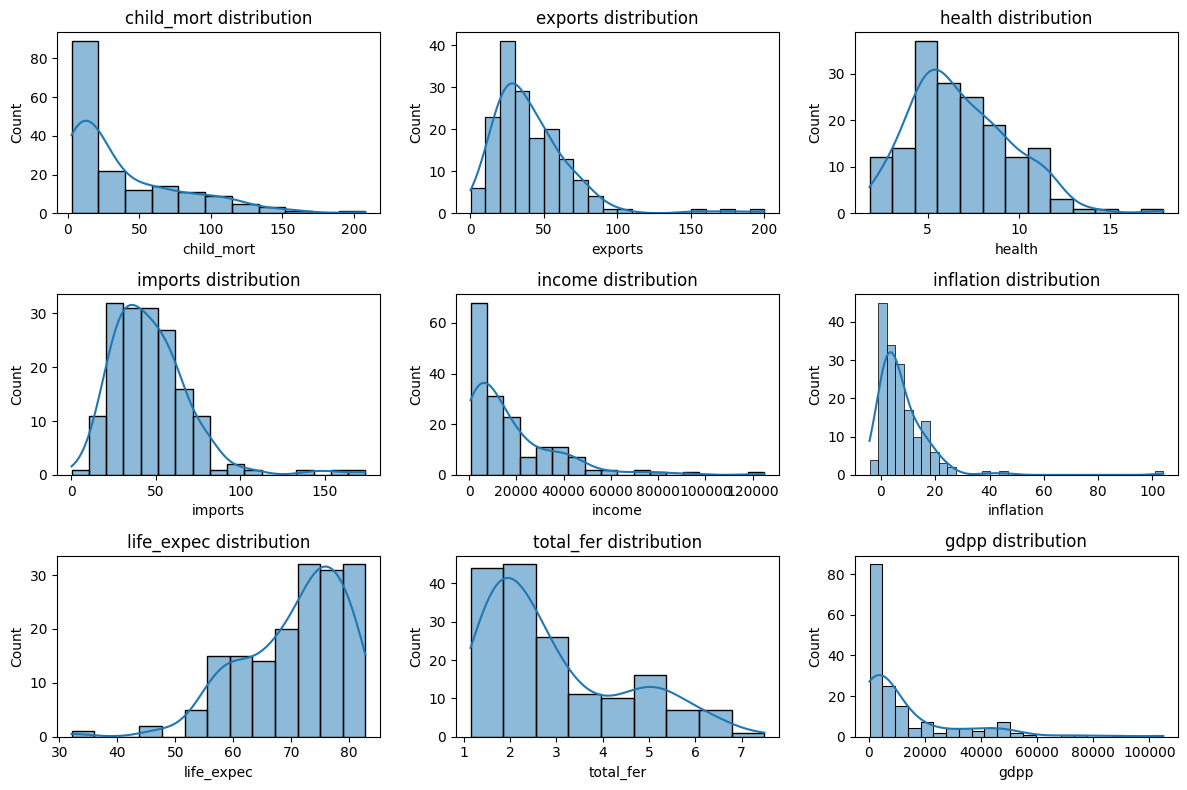

In [6]:
features = data.columns[1:]
plt.figure(figsize=(12,8))
i = 0
for feature  in features:
    plt.subplot(3,3,i+1)
    sns.histplot(data[feature], kde=True)
    plt.title(f"{feature} distribution")
    i+=1
plt.tight_layout()
plt.show()


Unsurprisingly, the distribution of many of the features is highly skewed. This demonstrates the importance of identifying countries that are the most in need of assistance. 


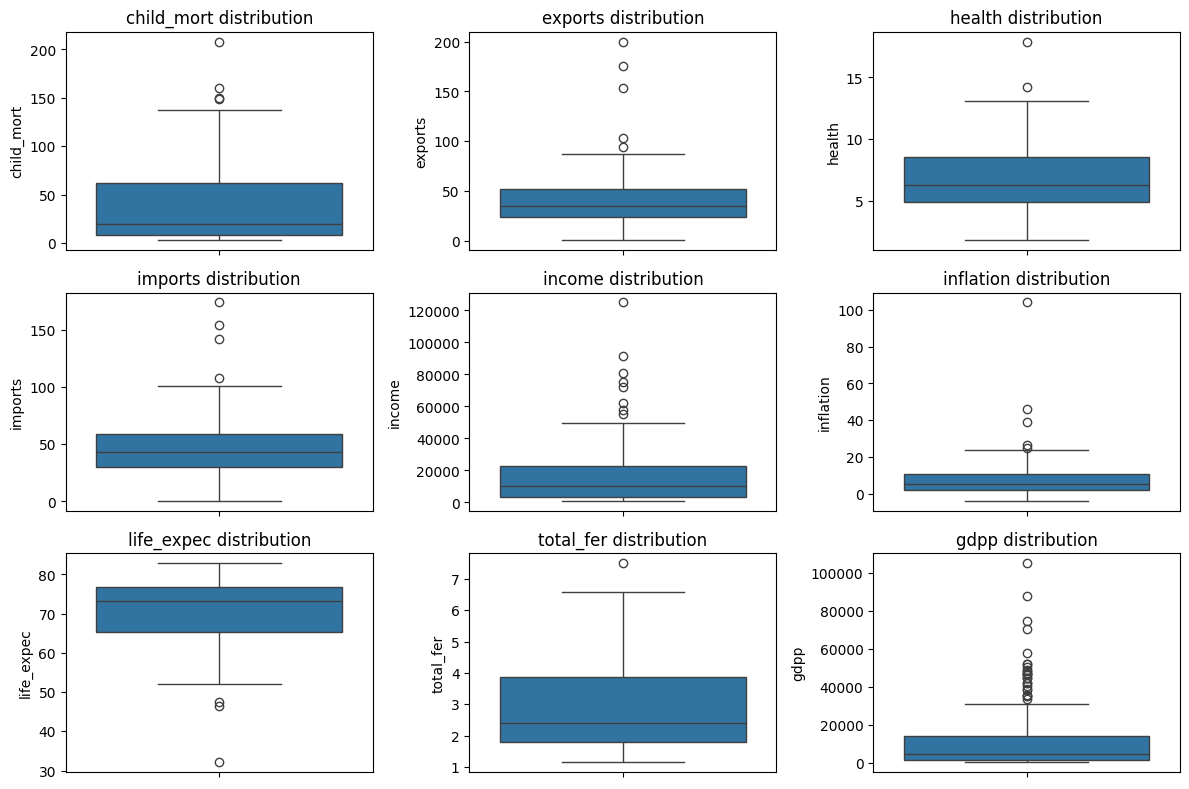

In [7]:
plt.figure(figsize=(12,8))
i = 0
for feature  in features:
    plt.subplot(3,3,i+1)
    sns.boxplot(data=data[feature], whis = 1.5)
    plt.title(f"{feature} distribution")
    i+=1
plt.tight_layout()
plt.show()

The above boxplots demonstrate the same point, from a different perspective where outliers can be identified. It is clear that income and gdpp contain the greatest number of outliers.

At this stage, it is noted that this degree of skewness and presence of outliers may affect the clustering algorithms. Since the outliers represent legitimate data, they cannot be filtered out and will have to be dealt with in other ways, such as scaling.


It may be of interest to see the 3 highest and lowest scoring countries for each of the metrics:

In [8]:
country = data["country"]
data.set_index('country', inplace=True)

# Get the top and bottom 3 countries for each metric
top_bottom_countries = {}

for metric in data.columns:
    top_bottom_countries[metric] = {
        'Top 3': data[metric].nlargest(3).index.tolist(),
        'Bottom 3': data[metric].nsmallest(3).index.tolist()
    }
# Display the result
for metric, countries in top_bottom_countries.items():
    print(f"\nTop and Bottom 3 countries for {metric}:")
    print(f"Top 3: {countries['Top 3']}")
    print(f"Bottom 3: {countries['Bottom 3']}")


Top and Bottom 3 countries for child_mort:
Top 3: ['Haiti', 'Sierra Leone', 'Chad']
Bottom 3: ['Iceland', 'Luxembourg', 'Singapore']

Top and Bottom 3 countries for exports:
Top 3: ['Singapore', 'Luxembourg', 'Malta']
Bottom 3: ['Myanmar', 'Timor-Leste', 'Eritrea']

Top and Bottom 3 countries for health:
Top 3: ['United States', 'Micronesia, Fed. Sts.', 'Sierra Leone']
Bottom 3: ['Qatar', 'Myanmar', 'Pakistan']

Top and Bottom 3 countries for imports:
Top 3: ['Singapore', 'Malta', 'Luxembourg']
Bottom 3: ['Myanmar', 'Brazil', 'Japan']

Top and Bottom 3 countries for income:
Top 3: ['Qatar', 'Luxembourg', 'Brunei']
Bottom 3: ['Congo, Dem. Rep.', 'Liberia', 'Burundi']

Top and Bottom 3 countries for inflation:
Top 3: ['Nigeria', 'Venezuela', 'Mongolia']
Bottom 3: ['Seychelles', 'Ireland', 'Japan']

Top and Bottom 3 countries for life_expec:
Top 3: ['Japan', 'Singapore', 'Switzerland']
Bottom 3: ['Haiti', 'Lesotho', 'Central African Republic']

Top and Bottom 3 countries for total_fer:
T

## Visualizing the relationship between features

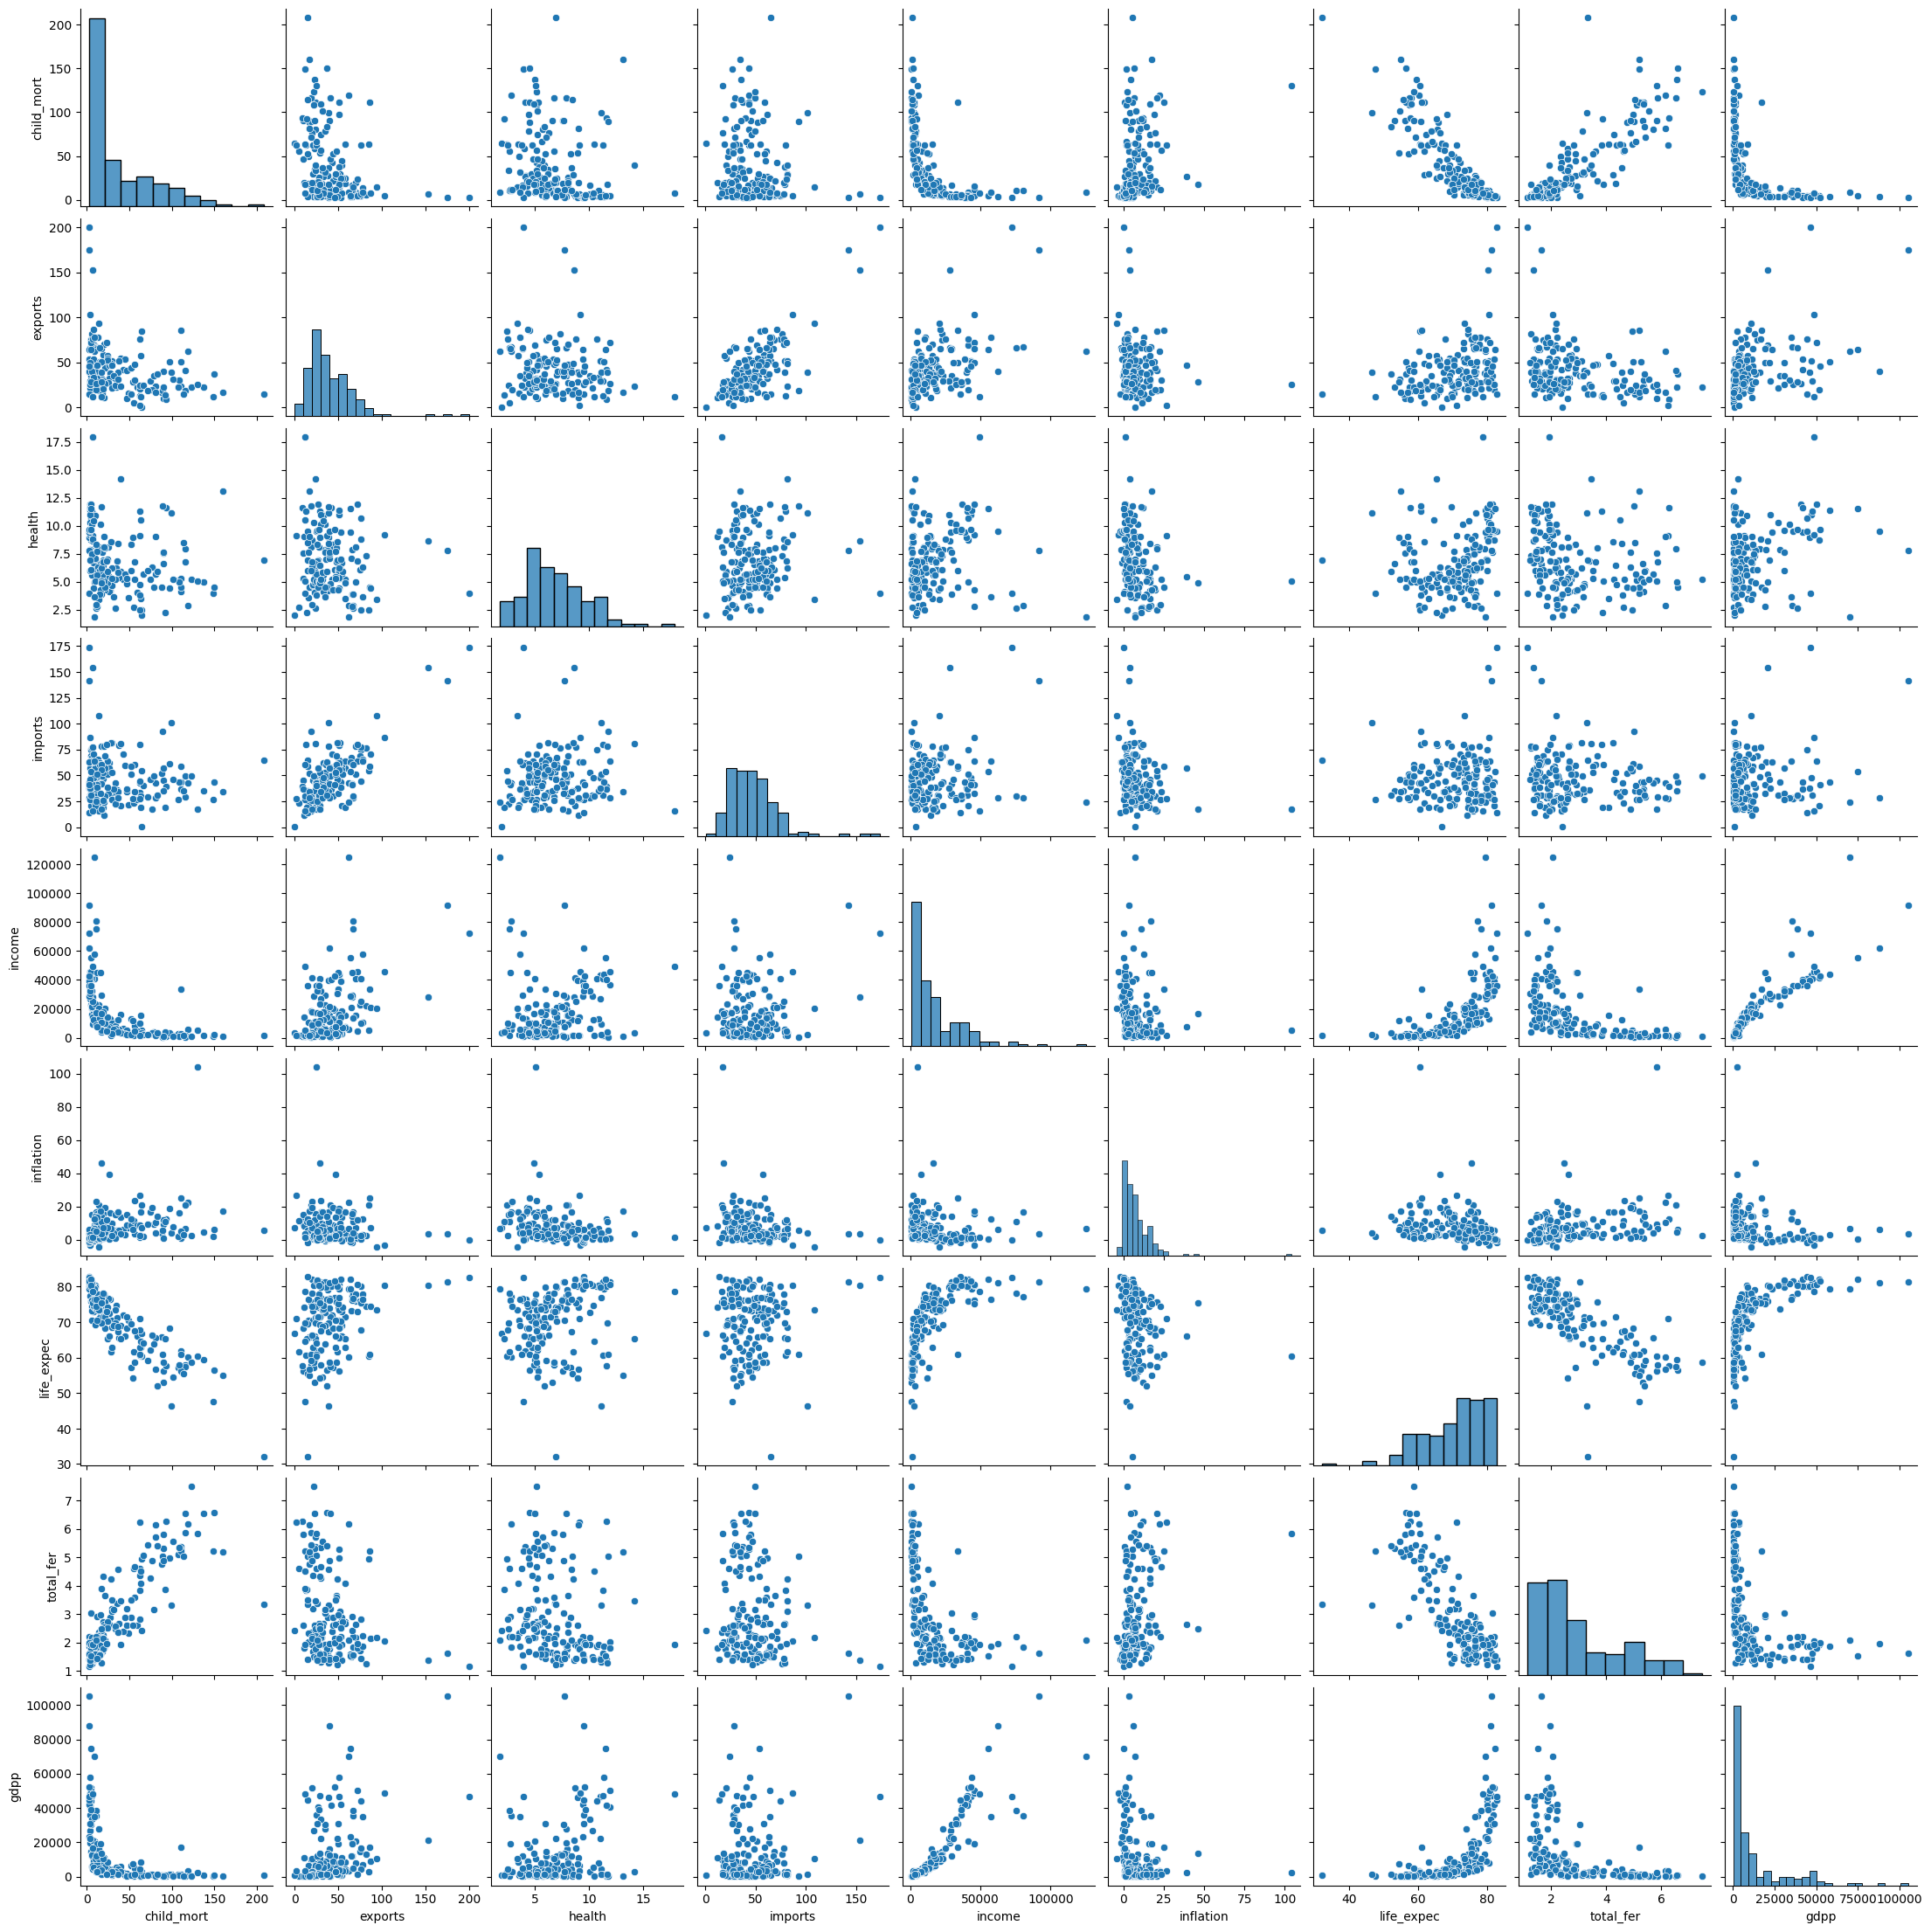

In [9]:
sns.pairplot(data)

* These pairplots allow us to visualize the relationship between variables and identify trends.
* To quantify the correlation, we can use a heat map as follows:

<Axes: >

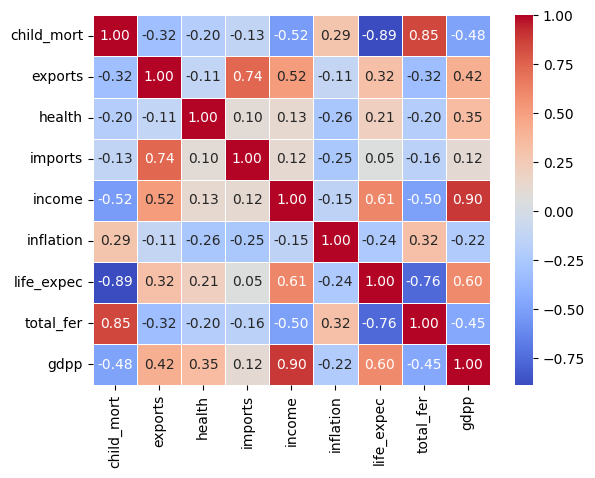

In [10]:
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidth=.5)

If we consider a correlation > 0.7 to be high correlation we can say the following:
* There is a high negative correlation between child mortality and life expectancy (-0.89)
* There is a high correlation between child mortality and total_fer (0.85)
* There is a high correlation between exports and imports (0.74)
* There is a high correlation between income and gdpp (0.9)
* There is a high negative correlation between life expectancy and total_fer (-0.76)

Based on this, it may be a good idea to group features with high correlation together, creating composite features.




## <p style="background-color:#0b5351;font-family:newtimeroman;color:#fbfffe;font-size:125%;text-align:center;border-radius:10px 10px; padding:20px; margin:0;"> Feature Engineering  </p>  <a id=”EDA″></a>


The following composite indexes are proposed:

**Health_index** = (life expec - child mort) - total_fer/2 + health) 
* This index groups together life expectancy, child mortality, total fertility and health spending to form an index with the aim of describing a countrys overall state with respect to healthcare matters.
* A higher fertility rate is penalized, as this is often associated with poor development. Higher health spending is favoured and a high difference between life expectancy and child mortality is favoured.
* A lower score indicates a country which is in a worse state and in more need of assistance.

**Economic_index** = Income + Gdpp - Inflation 
* This gives a measure of a countries overall economic wellbeing and assumes that higher income and gdpp are favoured and a lower inflation is desireable.

**Trade_ratio** = exports-imports
* In this case, it is assumed that a trade surplus is favoured for a developing country.



It is noted that these composite indexes are somewhat arbitrary and could easily be changed if the assumptions used in their creation were flawed.

Creating these composite indexes should also simplify the interpretation of the results of clustering.


## <p style="background-color:#0b5351;font-family:newtimeroman;color:#fbfffe;font-size:125%;text-align:center;border-radius:10px 10px; padding:20px; margin:0;"> Pre-Processing  </p>  <a id=”EDA″></a>


From the EDA, the features span across many different orders of magnitude. This could lead to problems in clustering, such as an imbalance in the contribution of certain features. This is obviously undesireable, and the features will be scaled to the same range prior as a pre-processing step.

From the EDA, we saw that the features are not neccesarily normally distributed and there are many outliers. In this case, the "RobustScaler" may be a suitable choice.

* The "StandardScaler" calculates the mean and standard deviation of each variable and scales the values to have a mean of 0 and standard deviation of 1. This is preferred if a variable is normally distributed, however that is not the case with the current dataset. This scaler is most common.

* The "RobustScaler" Ignores the outlers from the calculation of the mean and standard deviation, but otherwise follows the same procedure as the Standard Scaler. Values outside of the upper and lower quartiles are considered outliers.

## Creating the Composite Indexes

In [11]:
scaler = RobustScaler()
datascaled = scaler.fit_transform(data)

In [12]:
Health_i = (datascaled[:,6] - datascaled[:,0]) - datascaled[:,7]/2 + datascaled[:,2]
Econ_i = datascaled[:,4] + datascaled[:,8] - datascaled[:,5]
Trade_i = datascaled[:,1]-datascaled[:,3]

##
## This here is for only if we are doing clustering for each variable separately
Health_i = Health_i.reshape(-1,1)
Econ_i = Econ_i.reshape(-1,1)
Trade_i = Trade_i.reshape(-1,1)
comp_Indexes = {"Health": Health_i, "Economic": Econ_i, "Trade":Trade_i}
##


# Setting Up A DataFrame to use in clustering
clustering = {
    "Health_i": Health_i.ravel(),
    "Econ_i": Econ_i.ravel(),
    "Trade_i": Trade_i.ravel()
} 
clusteringDF = pd.DataFrame(clustering)

## Visualizing the distribution of the composite indexes

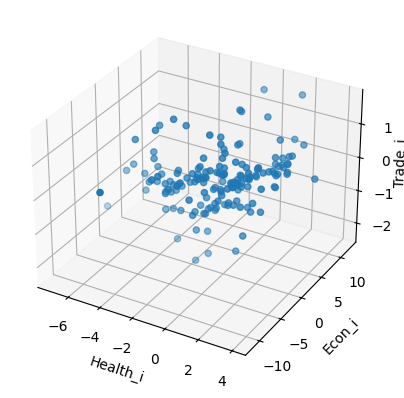

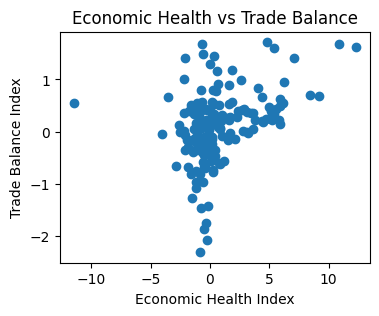

In [13]:
fig = plt.figure()#figsize=(8, 6)
ax = fig.add_subplot(111, projection='3d')

ax.scatter(clusteringDF['Health_i'], clusteringDF['Econ_i'], clusteringDF['Trade_i'])

# Set axis labels
ax.set_xlabel('Health_i')
ax.set_ylabel('Econ_i')
ax.set_zlabel('Trade_i')
ax.zaxis.labelpad=-2.5

plt.show()
print(" ")
fig = plt.figure(figsize=(4, 3))
plt.scatter(clusteringDF['Econ_i'], clusteringDF['Trade_i'])
plt.ylabel("Trade Balance Index")
plt.xlabel("Economic Health Index")
plt.title("Economic Health vs Trade Balance")
plt.show()


From the first plot, we can see that the majority of the data is equally spread.

From the second plot, there is a wide variation of scores on the trade balance index. As expected from the scaling, the majority of countries lie in the mean range for both indexes, however it seems fair to say that countries with higher economic health indexes, also have positive trade balances. Although there can be many differences in economic strategy between countries, it is inferred from this that a lower trade balance is not a desireable state for a developing country.

## <p style="background-color:#0b5351;font-family:newtimeroman;color:#fbfffe;font-size:125%;text-align:center;border-radius:10px 10px; padding:20px;">Model Selection</p>

There are several different approaches to clustering, each suited to a particular type of data distribution. Clustering is often broken into:
* **Hard Clustering**: Where every data point belongs completely to a particular cluster or not.
* **Soft Clustering**: Where the probability of a data point being in each of the clusters is assigned.

A simple overview of the most common types of clustering algorithms follows: 

* **Centroid Based Models**: These models use the proximity of datapoints to a centroid to cluster datapoints and the number of clusters must be pre-defined. The k-means algorithm is perhaps the most popular in this category.
  
* **Distribution Models**: These models group points together based on the probability that they belong to the same statistical distribution such as Gaussian, Binomial etc..
  
* **Density Models**: These models isolate regions with different densities assign regions with the similar density to the same cluster. These models are highly effective at identifying clusters with irregular shapes. DBSCAN is a popular model in this category.
  
* **Connectivity Models**: These models group data points together based on how close or connected they are. This uses the assumption that objects are more related to their neighbours than they are to far away objects. a An example is hierarchical clustering. These models have high interpretability but struggle to scale to large datasets.

Based on the distribution of the dataset previously shown, Distribution and Density based models do not seem suitable. Centroid based models or connectivity models may be the most suitable. K-Means and hierarchical clustering will be investigated.

https://www.analyticsvidhya.com/blog/2016/11/an-introduction-to-clustering-and-different-methods-of-clustering/#Types_of_Clustering

## <p style="background-color:#0b5351;font-family:newtimeroman;color:#fbfffe;font-size:125%;text-align:center;border-radius:10px 10px; padding:20px;">Clustering: K-Means</p>


## Determining Optimal Number of Clusters

To determine the optimal number of clusters for k-means, internal performance metrics of inertia and silhouette score will be calculated for a range of cluster numbers:
* **Inertia** is effectively a measure of how well a dataset was clustered. This is calculated by summing up the squared distances of each sample in a cluster to the cluster centre. The "elbow" point in this plot will indicate the optimal number of clusters.
* The **Silhouette Score** aims to measure the quality of the clusters. -1 indicates incorrect assignment, 0 indicates indifference between clusters and 1 indicates that clusters are clearly distriguised. 

In [14]:
def nclust(values):
    inertia = []
    silhouette = []
    K = range(1,10)
    for k in K:
        #Inertia
        model = KMeans(n_clusters = k, n_init="auto")
        model.fit(values)
        inertia.append(model.inertia_)  
        if k>1:
             #Silhouette Score
             labels = model.predict(values)
             silhouette_avg = silhouette_score(values, model.labels_)
             silhouette.append(silhouette_avg)
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(6, 3))
    axes[0].plot(K, inertia, marker = "o")
    axes[0].set_xlabel("Clusters")
    axes[0].set_ylabel("Inertia")
    axes[1].plot(K[1:], silhouette, marker = "o")
    axes[1].set_xlabel("Clusters")
    axes[1].set_ylabel("Silhoutte Score")
    plt.tight_layout()
    plt.show()    

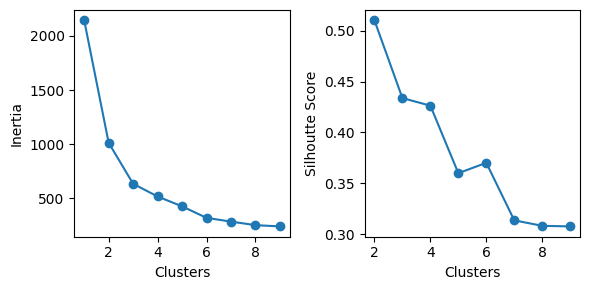

In [15]:
nclust(clusteringDF)

2 clusters appears to be optimal based on the elbow method and silhouette score approaches. A silhouette score of about 0.54 can be seen with 2 clusters

A value above 0.5 is usually considered to demonstrate reasonable clustering, with closer to 1 being the ideal value.

While the elbow method and inertia suggest that the 2 clusters is optimal, it became evident that this would not provide sufficient granularity to answer the question of which countries are most in need ot assistance. It was decided to increase the number of clusters to 3 to provide a more nuanced answer to this question. 

While this may lead to slightly poorer cluster definition and the misclassification of some countries, the countries at the extreme of each cluster should remain unaffected. These countries are of most interest in this project. 


## Fitting and Predicting

In [42]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init="auto")
clusteringDF["k-Means Clusters"]=kmeans.fit_predict(clusteringDF)
kmclusteringDF=clusteringDF
clusteringDF["Country"] = country

#Visualizing
clusteringDF.head()

,Health_i,Econ_i,Trade_i,k-Means Clusters,Country,Hierarchical Clusters
0,-3.261540,-1.205314,-0.963483,2,Afghanistan,0
1,0.573154,0.054317,-0.439723,0,Albania,0
2,-0.552256,-1.062514,0.540225,0,Algeria,0
3,-4.824089,-2.200315,1.004936,2,Angola,0
4,0.477212,1.504645,-0.165285,0,Antigua and Barbuda,0


## <p style="background-color:#0b5351;font-family:newtimeroman;color:#fbfffe;font-size:125%;text-align:center;border-radius:10px 10px; padding:20px;">Clustering: Hierarchical</p>

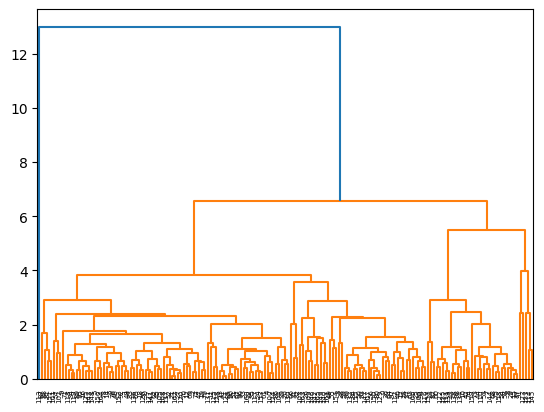

In [18]:
hclusteringDF = clusteringDF.drop(["k-Means Clusters", "Country"], axis=1)
clustering = linkage(hclusteringDF, method="average", metric='euclidean')
dendrogram(clustering)
plt.show()

In this case, the bisection of the largest vertical line intersect with 3 clusters, however since one cluster contains a single outlier, 4 clusters will be used. 

In [21]:
cluster_labels_av = cut_tree(clustering, n_clusters=4).reshape(-1, )
clusteringDF["Hierarchical Clusters"]=cluster_labels_av
clusteringDF.head()



,Health_i,Econ_i,Trade_i,k-Means Clusters,Country,Hierarchical Clusters
0,-3.261540,-1.205314,-0.963483,2,Afghanistan,0
1,0.573154,0.054317,-0.439723,0,Albania,0
2,-0.552256,-1.062514,0.540225,0,Algeria,0
3,-4.824089,-2.200315,1.004936,2,Angola,0
4,0.477212,1.504645,-0.165285,0,Antigua and Barbuda,0



## <p style="background-color:#0b5351;font-family:newtimeroman;color:#fbfffe;font-size:125%;text-align:center;border-radius:10px 10px; padding:20px;">Profiling Clusters</p>


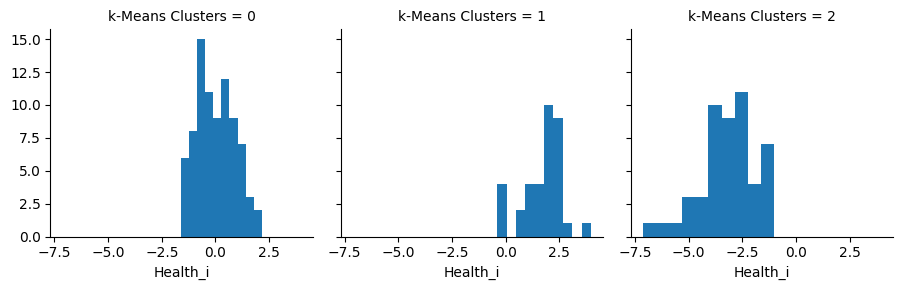

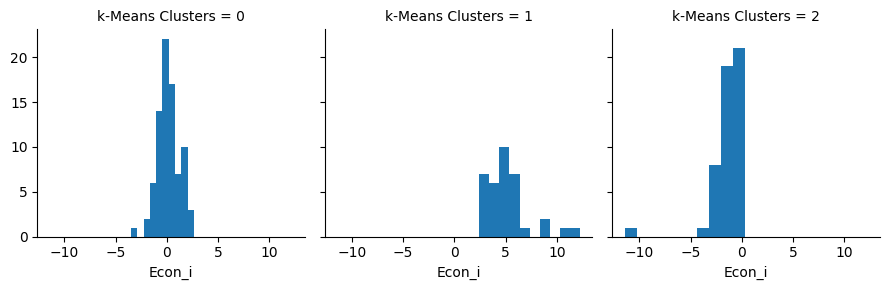

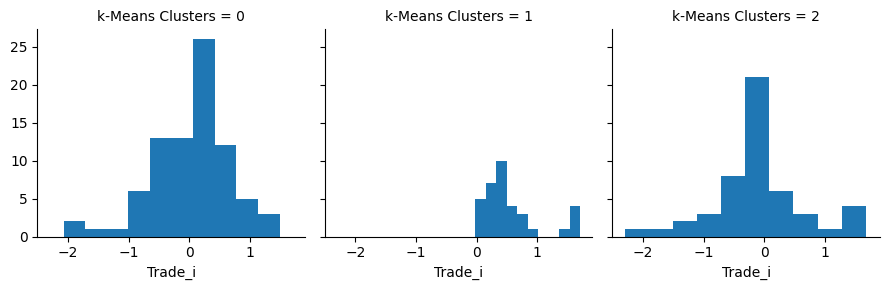

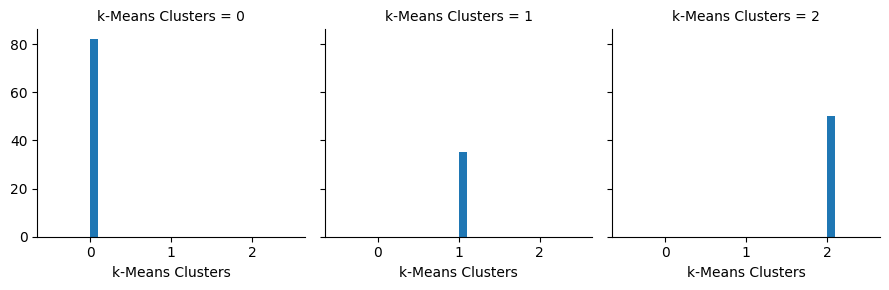

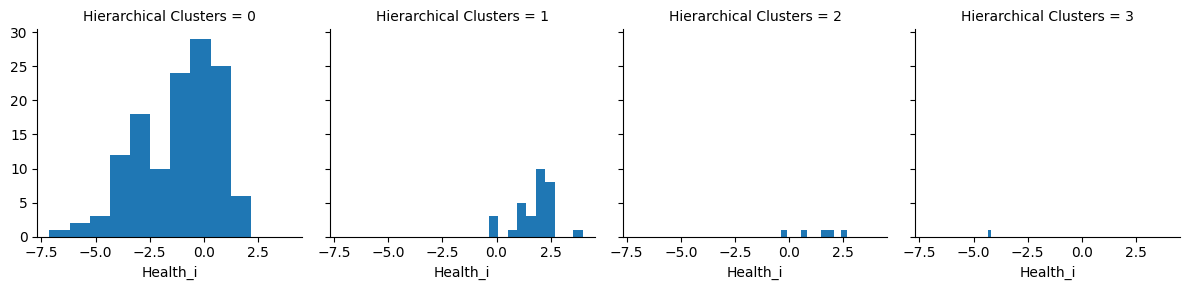

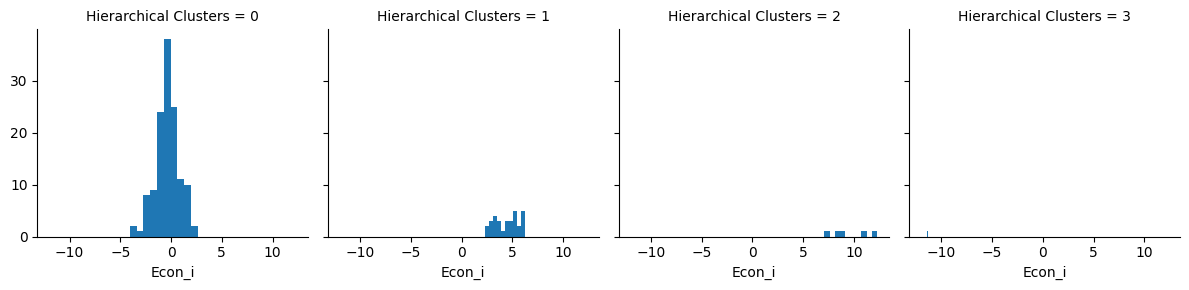

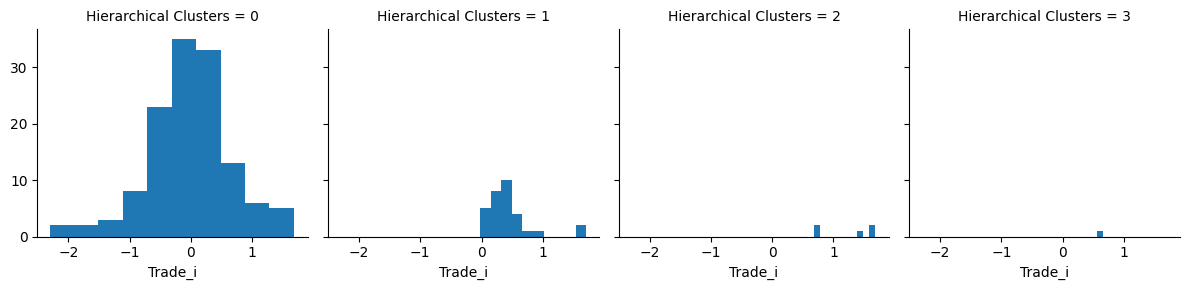

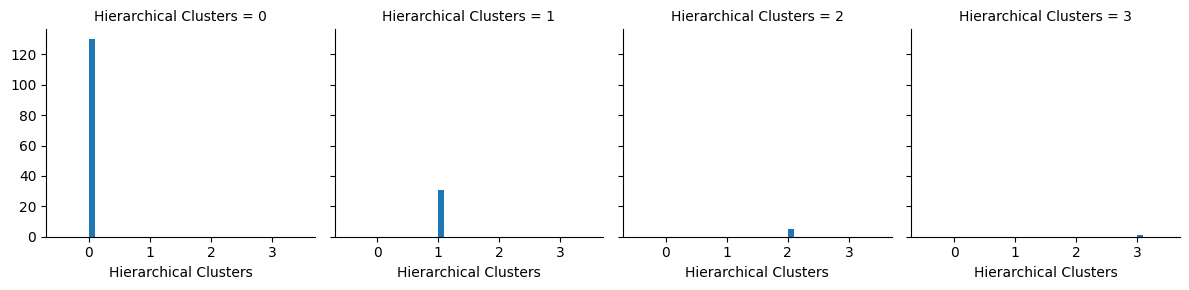

In [22]:
for c in clusteringDF.drop(["Country", "Hierarchical Clusters"], axis=1):
    grid = sns.FacetGrid(clusteringDF.drop("Country", axis=1), col="k-Means Clusters")
    grid.map(plt.hist, c)

for c in clusteringDF.drop(["Country", "k-Means Clusters"], axis=1):
    #print(c)
    grid = sns.FacetGrid(clusteringDF.drop("Country", axis=1), col="Hierarchical Clusters")
    grid.map(plt.hist, c)

**K-Means:**
* Cluster 0: This cluster contained the highest number of countries, who scored mid-range on all metrics compared to the other clusters.
* Cluster 1: This cluster conatined the lowest number of countries. This cluster had the highest values for the health index, econonomic health index and also trade balance index.
* Cluster 2: This cluster contained the second lowest number of countries and was categorized by significantly lower results for the health and economics index. While the trade index values were in closer proximity, they were still slightly lower than all other clusters.

**Based on the K-Means clustering, cluster 2 has the greatest need for assistance**


**Hierarchical**
* Cluster 0: This cluster contained the highest number of countries, with average to low scores on the health and economic indexes with a normal distribution on the trade index.
* Cluster 1: This cluster contained the second highest number of countries, scoring high on the health index, economic index and trade index,
* Cluster 2: This cluster contained only 5 countries, scoring relatively high on the health index, highest on the economic and trade indexes.
* Cluster 3: This cluster only contained a single country, with a low health index, the lowest economic index and an above average trade index.
  
**Based on the hierarchical clustering, cluster 3 and cluster 0 are in the most need. However, Cluster 0 contained the highest number of countries, therefore this would have to be filtered, as there is quite a lot of variation between the needs of countries within this cluster.**


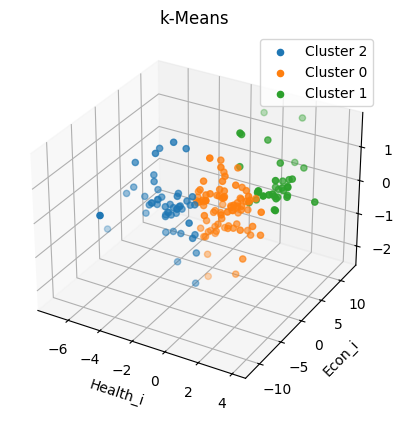

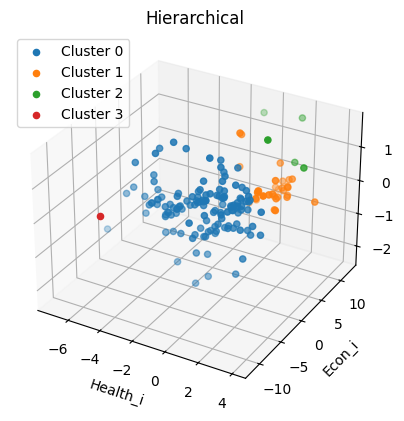

In [23]:
def cluster3Dplot(clusteringDF, algorithm):
    fig = plt.figure()#figsize=(8, 6)
    ax = fig.add_subplot(111, projection='3d')

    # Plot each cluster with a different color
    for cluster in clusteringDF[f'{algorithm} Clusters'].unique():
        cluster_data = clusteringDF[clusteringDF[f'{algorithm} Clusters'] == cluster]
        ax.scatter(cluster_data['Health_i'], cluster_data['Econ_i'], cluster_data['Trade_i'], label=f"Cluster {cluster}")
        
    # Set axis labels
    ax.set_xlabel('Health_i')
    ax.set_ylabel('Econ_i')
    ax.set_zlabel('Trade_i')
    # Show the plot
    plt.title(algorithm)
    plt.legend()
    plt.show()

cluster3Dplot(clusteringDF, "k-Means")
cluster3Dplot(clusteringDF, "Hierarchical")


**There is a significant difference when comparing the two graphs above.** This is clearly due to the difference in the centroid-based and connectivity based approaches.
* Cluster 3 from the hierarchical approach was grouped in with cluster 2 from k-means.
* Clusters 0 and 1 from the hierarchical approach bear some similarity to clusters 0 and 2 from k-means.
* Cluster 2 from the hierarchical approach overlaps with cluster 1 from k-means although with far fewer countries included.


## Outputting Members of Each Clustering Group

In [24]:

for i in range(3):
    # Finding countries associated with each cluster
    cluster_countries_km = clusteringDF[clusteringDF["k-Means Clusters"]==i]["Country"].tolist()
    print(f"\nCountries in cluster {i} using k-Means")
    print(cluster_countries_km)
for i in range(4):
    cluster_countries_h = clusteringDF[clusteringDF["Hierarchical Clusters"]==i]["Country"].tolist()
    print(f"\nCountries in cluster {i} using hierarchical clusteering")
    print(cluster_countries_h)



Countries in cluster 0 using k-Means
['Albania', 'Algeria', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Azerbaijan', 'Bahrain', 'Barbados', 'Belarus', 'Belize', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Bulgaria', 'Cambodia', 'Cape Verde', 'Chile', 'China', 'Colombia', 'Costa Rica', 'Croatia', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Estonia', 'Fiji', 'Georgia', 'Grenada', 'Guatemala', 'Guyana', 'Hungary', 'Iran', 'Iraq', 'Jamaica', 'Jordan', 'Kazakhstan', 'Kiribati', 'Kyrgyz Republic', 'Latvia', 'Lebanon', 'Libya', 'Lithuania', 'Macedonia, FYR', 'Malaysia', 'Maldives', 'Mauritius', 'Micronesia, Fed. Sts.', 'Moldova', 'Montenegro', 'Morocco', 'Oman', 'Panama', 'Paraguay', 'Peru', 'Philippines', 'Poland', 'Romania', 'Russia', 'Rwanda', 'Samoa', 'Saudi Arabia', 'Serbia', 'Seychelles', 'Slovak Republic', 'Solomon Islands', 'South Africa', 'Sri Lanka', 'St. Vincent and the Grenadines', 'Suriname', 'Thailand', 'Tonga', 'Tunisia', 'Turkey', '

Some sort of really insightful comment

### Finding Lowest Performing Countries

In [40]:
def lowestScoring(df, cluster_num, num_countries,algorithm):
    # Separating a specific cluster
    cluster_df = df[df[f'{algorithm}Clusters'] == cluster_num]
    # Dataframe to store lowest 5 performing countries for each index (metric)
    dfs = []
   
    for metric in df.columns[0:-3]:  
        # returning the indexes of countries with the 5 lowest scores
        lowest_score_indices = cluster_df[metric].nsmallest(num_countries).index
        # Retrieve the country names and scores corresponding to the lowest scores
        country_scores = cluster_df.loc[lowest_score_indices, ['Country', metric]]
        country_scores.rename(columns={metric: 'Score'}, inplace=True)
        country_scores['Index'] = metric
        dfs.append(country_scores)

    #Combining into one dataframe
    lowest_scores = pd.concat(dfs, ignore_index=True)
        
    return lowest_scores

lowestkm = lowestScoring(clusteringDF, 2,5, "k-Means ")
print("5 Lowest scoring countries in k-Means cluster 2:")
print(lowestkm)
lowesth = lowestScoring(clusteringDF, 0,5, "Hierarchical ")
print("\n", "5 Lowest scoring countries in Hierarchical cluster 0:")
print(lowesth)




5 Lowest scoring countries in k-Means cluster 2:
                     Country      Score     Index
0                      Haiti  -7.129693  Health_i
1   Central African Republic  -5.941962  Health_i
2                       Chad  -5.359402  Health_i
3                     Angola  -4.824089  Health_i
4                       Mali  -4.725246  Health_i
5                    Nigeria -11.460742    Econ_i
6                   Mongolia  -4.055609    Econ_i
7                Timor-Leste  -2.861705    Econ_i
8                      Yemen  -2.582098    Econ_i
9           Congo, Dem. Rep.  -2.544703    Econ_i
10                   Liberia  -2.303928   Trade_i
11                   Lesotho  -1.861306   Trade_i
12                     Haiti  -1.464626   Trade_i
13                Tajikistan  -1.265485   Trade_i
14                   Comoros  -0.965727   Trade_i

 5 Lowest scoring countries in Hierarchical cluster 0:
                     Country     Score     Index
0                      Haiti -7.129693  Health

* Using both k-means and hierarchical clustering, the clusters in need of the most help have been identified, and within each of those cluters, the 5 lowest performing countries in each metric have bee highlighted.
* There is quite some overlap between the results from both clustering approaches, however hierarchical clustering resulting in Nigeria being assigned its own cluster.
* An NGO could use this information to make informed data-driven decisions about which countries to fund. Furthermore, it also allows for more specific funding. For example, countries that scored the lowest in the healthcare index could be given targetted funding towards their healthcare infrastructure, and countries who scored low on the trade index, could be included in trade deals.

**Considering the distribution of data shown earlier, when the goal is creating distinct groups of countries that perform better or worse on the various metrics, grouping based on a clusters proximity to a centroid seems more appropriate than grouping based on connectedness.**

## <p style="background-color:#0b5351;font-family:newtimeroman;color:#fbfffe;font-size:125%;text-align:center;border-radius:10px 10px; padding:20px; margin:0;">Discussion / Conclusions</p>  <a id=”libraries″></a>

This projects acts as more of a demonstration of the capabilites of clustering for such a problem and noes not claim to provide highly accurate results. Some obvious limitations are as follows:

* Since many of the features were highly correlated, there were only 3 features used in the clustering.
* The formulation of the composite indexes used for clustering was somewhat arbitrary.
* Highly skewed features, as per the nature of the dataset, may have affected the model, although this should hace been mitigated using the Robust Scaler.
* It is well known that K-Means can give different results based on the initialization of the centroids. For increased accuracy, iterative the results or using K-Means ++, which selects the initial centroids by sampling may have improved accuracy.
* The silhouette score for K-Means was lower than desireable which likely led to reduced accuracy in clustering.
* Fundamental differences in K-Means and hierarchical clustering in theory have been outlined. This resulted in different cluster composition, which makes the results more difficult to interpret.



**Perhaps the most valueable conclusion of this project is that it is essential to analyze the distribution of the data and use this to decide on an appropriate clustering model. There are fundamental differences in the operational principles of K-Means and Hierarchical clustering as has been described.**